<a href="https://colab.research.google.com/github/KanVux/Spam_Email_Detection/blob/main/FNN-Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Thu thập dữ liệu

In [ ]:
!pip install tensorflow

In [ ]:
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import files

# Load file csv vào một dataframe và hiển thị các mẫu email đầu của dataset
df = pd.read_csv('/content/drive/MyDrive/NienLuan/Dataset/spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
# Có một cột không tên chỉ có số tăng dần -> không hữu ích -> xóa bỏ
columns_need_to_drop = ['Unnamed: 0']
df.drop(columns_need_to_drop, axis=1, inplace=True)
df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
# Kiểm tra có các email bị trùng nên cần được xóa
df[df.duplicated()]
# Loại bỏ các email bị trùng
df.drop_duplicates(inplace=True)

label
ham     3531
spam    1462
Name: count, dtype: int64


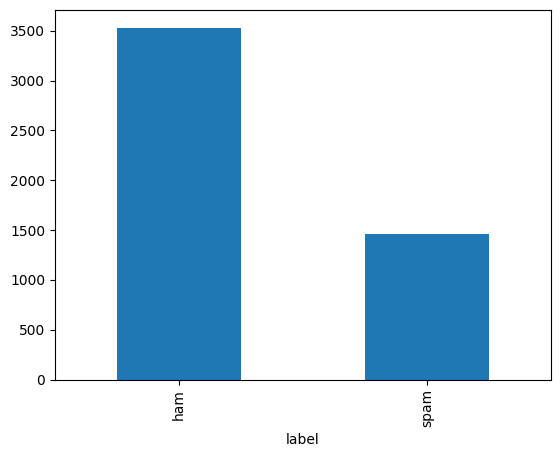

In [ ]:
# Kiểm tra số lượng email có ích (ham) và email spam
df["label"].value_counts().plot(kind="bar");
dff = df["label"].value_counts()
print(dff)

In [ ]:
# X = nội dung email (input: nội dung feed cho các model)
X = df['text']
# y = label_num (output: lớp cần được phân loại)
y = df['label_num']

print(X,y)

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5165    Subject: fw : crosstex energy , driscoll ranch...
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: text, Length: 4993, dtype: object 0       0
1       0
2       0
3       1
4       0
       ..
5165    0
5166    0
5167    0
5169    0
5170    1
Name: label_num, Length: 4993, dtype: int64


## Tiền xử lý dữ liệu (Preprocessing)

In [ ]:
!pip install nltk

In [ ]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Tải dữ liệu NLTK cần thiết
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Lấy các từ dừng (stopwords) trong tiếng Anh
stop_word = set(stopwords.words('english'))

# Khai báo bổ đề ngôn ngữ
lemmatizer = WordNetLemmatizer()

# Loại bỏ các chữ cái lặp lại liên tiếp trong từ
def remove_duplicate_letters(text):
    """Loại bỏ các chữ cái lặp lại liên tiếp trong một từ."""
    if not text:
        return ""
    result = text[0]
    for char in text[1:]:
        if char != result[-1]:
            result += char
    return result

# Tiền xử lý dữ liệu
def preprocess_text(text):
    """Tiền xử lý chuỗi văn bản."""
    # Đổi toàn bộ chữ thành chữ thường
    text = text.lower()
    # Loại bỏ các dấu câu và ký tự đặc biệt
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)
    # Loại bỏ khoảng trắng thừa
    text = re.sub(r'\s+', ' ', text)
    # Loại bỏ các ký tự số
    text = re.sub(r'\d+', '', text)
    # Áp dụng hàm loại bỏ chữ cái lặp lại
    text = ' '.join([remove_duplicate_letters(word) for word in text.split()])
    # Tokenize từ và loại bỏ các từ dừng (stopwords)
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_word]
    # Chuyển các từ về dạng nguyên bản (lemmatize)
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Trả về chuỗi đã tiền xử lý
    return ' '.join(tokens)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df['cleaned_text'] = df['text'].apply(preprocess_text)
X=df['cleaned_text']
df.head()

,label,text,label_num,cleaned_text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter folow note gave m...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom january se atached file hplnol...
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat ho ho ho around wonderful...
3,spam,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop window ofice cheap main tren...
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,subject indian spring deal bok teco pvr revenu...


# Vecto hóa

## Với TF-IDF

In [ ]:
# Chuyển đổi văn bản thành vector TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(X).toarray()

# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Sử dụng SMOTE để cân bằng dữ liệu
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
print(f"Số lượng mẫu trước SMOTE: {X.shape[0]}")
print(f"Số lượng mẫu sau SMOTE: {X_smote.shape[0]}")
X_smote.shape, y_smote.shape

Số lượng mẫu trước SMOTE: 4993
Số lượng mẫu sau SMOTE: 7062


((7062, 1000), (7062,))

# Chia dữ liệu

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5649, 1000), (1413, 1000), (5649,), (1413,))

# Mô hình

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(16, input_dim=1000, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Lớp đầu ra cho bài toán phân loại nhị phân
model.add(Dense(1, activation='sigmoid'))  # Sử dụng sigmoid cho phân loại nhị phân

# Biên dịch mô hình với Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',  # Sử dụng binary_crossentropy cho phân loại nhị phân
              metrics=['accuracy'])

# Xem tóm tắt mô hình
model.summary()

# Kiểm tra shape của y_train (nên là (n_samples,) với nhãn là 0 hoặc 1)
print(y_train.shape)




Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 16)                  │          16,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,433 (64.19 KB)

 Trainable params: 16,369 (63.94 KB)

 Non-trainable params: 64 (256.00 B)

(5649,)


In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32,validation_data=(X_test, y_test))
X_test.shape, y_test.shape

Epoch 1/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7283 - loss: 0.5525 - val_accuracy: 0.9554 - val_loss: 0.5052
Epoch 2/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9466 - loss: 0.1598 - val_accuracy: 0.9795 - val_loss: 0.2137
Epoch 3/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9729 - loss: 0.0934 - val_accuracy: 0.9788 - val_loss: 0.0863
Epoch 4/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9791 - loss: 0.0718 - val_accuracy: 0.9774 - val_loss: 0.0735
Epoch 5/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9861 - loss: 0.0507 - val_accuracy: 0.9766 - val_loss: 0.0781
Epoch 6/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9886 - loss: 0.0405 - val_accuracy: 0.9781 - val_loss: 0.0718
Epoch 7/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9890 - loss: 0.0377 - val_accuracy: 0.9752 - val_loss: 0.0766
Epoch 8/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9938 - loss: 0.0217 - val_accuracy: 0.

((1413, 1000), (1413,))

In [ ]:
# Đánh giá mô hình trên tập test
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Độ chính xác trên tập test: {accuracy*100:.2f}%")

# Dự đoán trên dữ liệu mới
y_pred = (model.predict(X_test) > 0.5).astype("int32")


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9823 - loss: 0.0967
Độ chính xác trên tập test: 97.88%
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


# Trực quan hóa kết quả

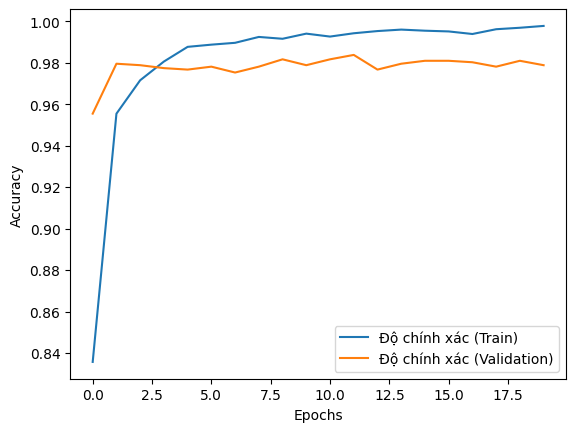

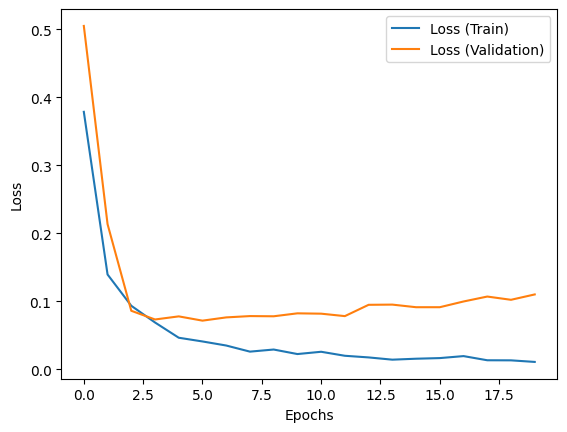

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Trực quan hóa quá trình huấn luyện
plt.plot(history.history['accuracy'], label='Độ chính xác (Train)')
plt.plot(history.history['val_accuracy'], label='Độ chính xác (Validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Loss (Train)')
plt.plot(history.history['val_loss'], label='Loss (Validation)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
(1413,)


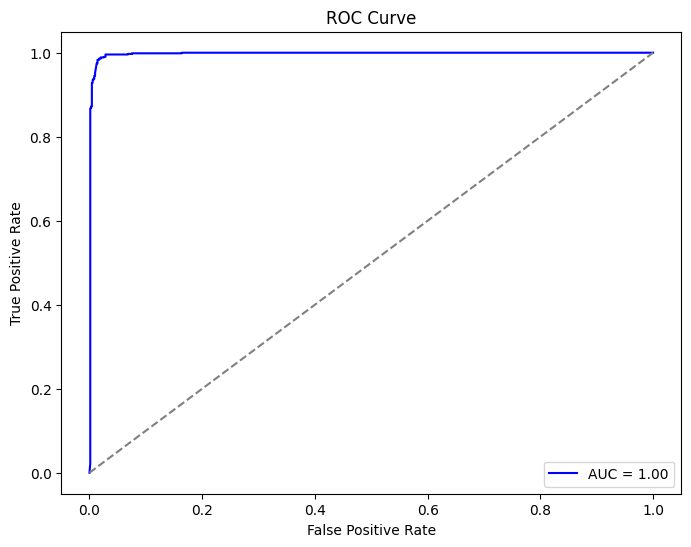

AUC Score: 1.00


In [ ]:
# Tính toán giá trị dự đoán xác suất
y_pred_proba = model.predict(X_test).ravel()
print(y_pred_proba.shape)  # Kiểm tra shape trước khi flatten

# Tính FPR, TPR và thresholds cho ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Vẽ ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

print(f"AUC Score: {roc_auc:.2f}")


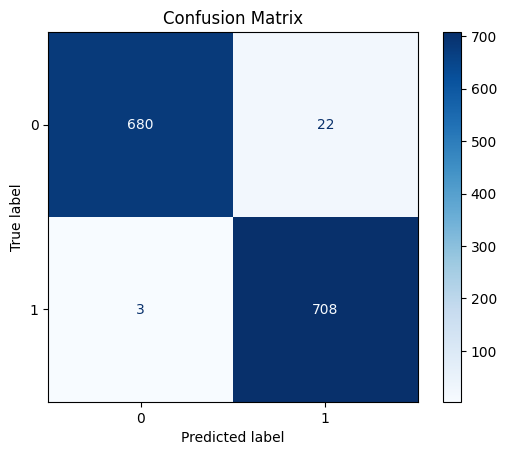

In [ ]:
# Dự đoán nhãn cuối cùng
y_pred = (y_pred_proba > 0.5).astype("int32")

# Tính confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Hiển thị confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['label_num'].unique())

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Tính classification report
report = classification_report(y_test, y_pred)

# In classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       702
           1       0.97      1.00      0.98       711

    accuracy                           0.98      1413
   macro avg       0.98      0.98      0.98      1413
weighted avg       0.98      0.98      0.98      1413



In [ ]:
# Lưu mô hình
model.save("/content/drive/MyDrive/NienLuan/Model/fnn_spam_classifier.h5")